In [20]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [266]:
database_path = r'C:\\Users\\hp\\OneDrive\\Desktop\\SQL and Tableu Files\\Pathao SQL\\queue_system_sqlite3.db'

# Connecting to the SQLite database
conn = sqlite3.connect(database_path)

In [267]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)['name'].tolist()

In [268]:
dfs ={}

for table in tables:
    dfs[table]= pd.read_sql_query(f'SELECT * FROM {table}', conn)

In [269]:
# Accessing different tables as the form of databases.
calls_df = dfs['calls']
call_statuses_df = dfs['call_statuses']
counters_df = dfs['counters']
queues_df = dfs['queues']
services_df = dfs['services']

In [270]:
conn.close()

In [271]:
calls_df.head()

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,created_at,updated_at,call_status_id
0,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,2024-01-25 18:34:01,2024-01-25 18:34:14,1.0
1,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2024-01-25 18:34:16,2024-01-25 18:34:24,1.0
2,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,None,00:00:13,None,None,2024-01-25 18:34:53,2024-01-25 18:34:53,NaN
3,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,2024-01-25 18:35:14,2024-01-25 18:35:18,1.0
4,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,2024-01-25 18:35:58,2024-01-25 18:37:00,1.0


In [272]:
# Merging of different tables.
# Merge calls with call_statuses.
merged_df = pd.merge(calls_df, call_statuses_df, left_on='call_status_id', right_on='id', suffixes=('', '_status'))

# Merge with counters.
merged_df = pd.merge(merged_df, counters_df, left_on='counter_id', right_on='id', suffixes=('', '_counter'))

# Merge with queues
merged_df = pd.merge(merged_df, queues_df, left_on='queue_id', right_on='id', suffixes=('', '_queue'))

# Merge with services
merged_df = pd.merge(merged_df, services_df, left_on='service_id', right_on='id', suffixes=('', '_service'))

In [273]:
merged_df.shape

(3335, 62)

In [274]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3335 non-null   int64  
 1   queue_id                   3335 non-null   int64  
 2   service_id                 3335 non-null   int64  
 3   counter_id                 3335 non-null   int64  
 4   user_id                    3335 non-null   int64  
 5   token_letter               3335 non-null   object 
 6   token_number               3335 non-null   int64  
 7   called_date                3335 non-null   object 
 8   started_at                 3335 non-null   object 
 9   ended_at                   3335 non-null   object 
 10  waiting_time               3335 non-null   object 
 11  served_time                2737 non-null   object 
 12  turn_around_time           2737 non-null   object 
 13  created_at                 3335 non-null   objec

In [275]:
merged_df.sample(10)

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,status_message_format,status_message_positions,ask_name,name_required,ask_email,email_required,ask_phone,phone_required,created_at_service,updated_at_service
2388,2818,2468,2,10,11,NR,13,2024-02-12,2024-02-12 11:35:03,2024-02-12 11:45:29,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
2549,3033,2630,2,4,12,NR,79,2024-02-12,2024-02-12 16:55:59,2024-02-12 17:11:55,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
929,1127,987,2,9,4,NR,48,2024-02-01,2024-02-01 15:28:15,2024-02-01 15:44:22,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
1631,1912,1702,2,2,13,NR,27,2024-02-07,2024-02-07 13:41:05,2024-02-07 13:53:33,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
127,191,160,2,1,5,NR,55,2024-01-26,2024-01-26 15:56:27,2024-01-26 16:07:14,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
326,429,336,3,4,12,T,15,2024-01-28,2024-01-28 17:05:14,2024-01-28 17:15:53,...,None,None,0,0,0,0,0,0,2024-01-23 10:31:10,2024-01-23 10:31:10
1259,1503,1342,2,8,14,NR,15,2024-02-05,2024-02-05 11:45:28,2024-02-05 12:20:34,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
1928,2241,1992,2,2,13,NR,68,2024-02-08,2024-02-08 16:52:51,2024-02-08 17:08:02,...,None,None,0,0,0,0,0,0,2024-01-23 10:30:10,2024-01-23 10:34:26
2344,2769,2423,1,3,10,W,109,2024-02-11,2024-02-11 16:55:42,2024-02-11 16:58:23,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32
207,301,261,1,1,5,W,50,2024-01-28,2024-01-28 12:54:08,2024-01-28 13:01:04,...,None,None,0,0,0,0,0,0,2024-01-23 10:29:32,2024-01-23 10:29:32


In [276]:
merged_df.nunique()

id                    3335
queue_id              3334
service_id               3
counter_id              10
user_id                 13
                      ... 
email_required           1
ask_phone                1
phone_required           1
created_at_service       3
updated_at_service       3
Length: 62, dtype: int64

In [277]:
zero_unique_value_cols = merged_df.columns[merged_df.nunique() == 0]
zero_unique_value_cols

Index(['name_queue', 'email', 'phone', 'optin_message_format',
       'call_message_format', 'noshow_message_format',
       'completed_message_format', 'status_message_format',
       'status_message_positions'],
      dtype='object')

In [278]:
# Dropping columns with 0 unique category.
for table in zero_unique_value_cols:
    merged_df.drop(columns=[table], inplace=True)

In [279]:
merged_df.nunique()

id                           3335
queue_id                     3334
service_id                      3
counter_id                     10
user_id                        13
token_letter                    3
token_number                  119
called_date                    20
started_at                   3327
ended_at                     3327
waiting_time                 2778
served_time                  1269
turn_around_time             2399
created_at                   3331
updated_at                   3327
call_status_id                  2
id_status                       2
name                            2
created_at_status               1
updated_at_status               1
id_counter                     10
name_counter                   10
status                          1
created_at_counter             10
updated_at_counter             10
id_queue                     3334
service_id_queue                3
number                        119
called                          1
reference_no  

In [280]:
one_unique_cate = ['called', 'position', 'start_number', 'status_service', 'sms_enabled', 'optin_message_enabled',
                   'call_message_enabled', 'noshow_message_enabled', 'ask_name', 'status_message_enabled', 'completed_message_enabled',
                   'name_required', 'ask_email', 'email_required', 'ask_phone', 'phone_required']

In [281]:
for table in one_unique_cate:
    print(merged_df[table].unique())

[1]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


**Dropping column which may not be useful for us or for feature selection.**

In [282]:
for table in one_unique_cate:
    merged_df.drop(columns=[table], inplace=True)

In [283]:
merged_df.shape

(3335, 37)

In [284]:
merged_df.head()

,id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,...,number,reference_no,letter,created_at_queue,updated_at_queue,id_service,name_service,letter_service,created_at_service,updated_at_service
0,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,...,1,wzkYsTk40,W,2024-01-25 18:19:28,2024-01-25 18:26:13,1,WIS (W),W,2024-01-23 10:29:32,2024-01-23 10:29:32
1,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,...,2,DZYdzvM4P,W,2024-01-25 18:20:37,2024-01-25 18:34:16,1,WIS (W),W,2024-01-23 10:29:32,2024-01-23 10:29:32
2,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,...,3,old87iht8,W,2024-01-25 18:24:57,2024-01-25 18:35:14,1,WIS (W),W,2024-01-23 10:29:32,2024-01-23 10:29:32
3,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,...,1,PbuPf1zuo,T,2024-01-25 18:35:29,2024-01-25 18:35:58,3,TRAINING (T),T,2024-01-23 10:31:10,2024-01-23 10:31:10
4,36,51,3,3,2,T,2,2024-01-25,2024-01-25 19:08:49,2024-01-25 19:08:55,...,2,416TSapZL,T,2024-01-25 18:35:32,2024-01-25 19:08:49,3,TRAINING (T),T,2024-01-23 10:31:10,2024-01-23 10:31:10


In [285]:
filter1 = ((merged_df['token_letter'] == merged_df['letter']) & (merged_df['letter_service'] == merged_df['letter'])).all()
print(filter1)

filter2 = (merged_df['service_id'] == merged_df['id_service']).all()
print(filter2)

filter3 = (merged_df['token_number'] == merged_df['number']).all()
print(filter3)

filter4 = (merged_df['call_status_id'] == merged_df['id_status']).all()
print(filter4)

filter5 = (merged_df['counter_id'] == merged_df['id_counter']).all()
print(filter5)

filter6 = (merged_df['queue_id'] == merged_df['id_queue']).all()
print(filter6)

True
True
True
True
True
True


**From different filters we can clearly see the repeated columns which represents the same thing. So, we can use only one among them**

In [286]:
merged_df.drop(columns=['letter', 'letter_service', 'id_service', 'number', 'id_status', 'id_counter', 'id_queue'], inplace=True)

#### Checking Duplicates

In [287]:
merged_df.duplicated().sum()

0

#### Checking outliers.

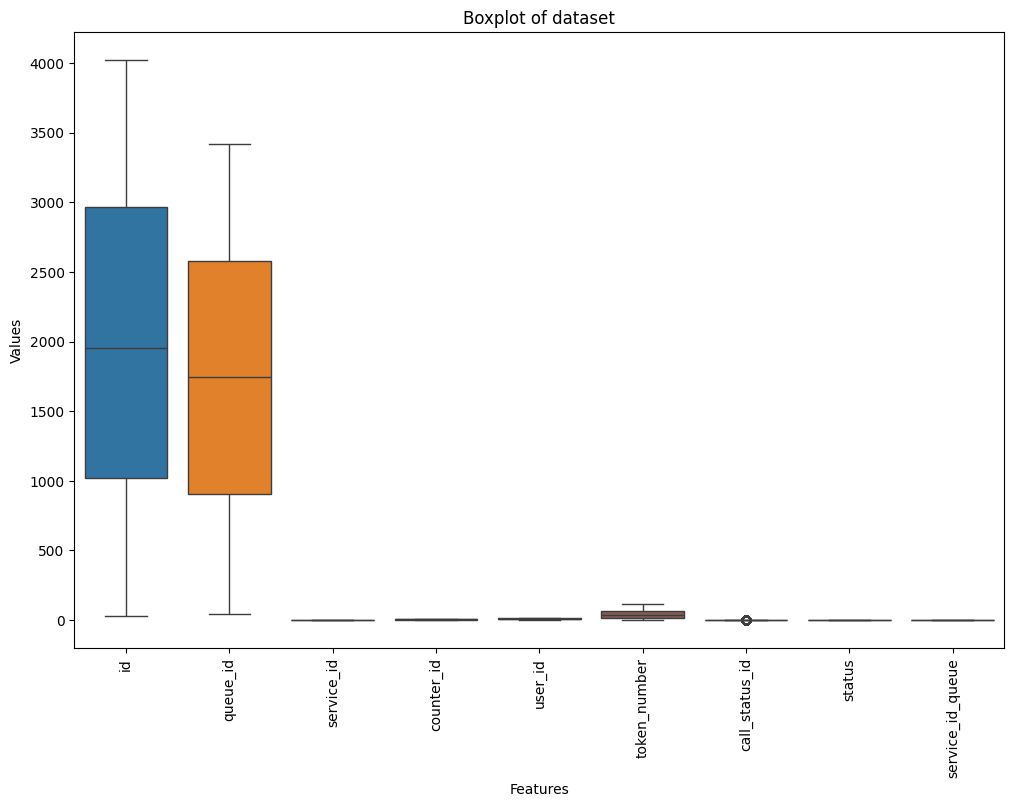

In [288]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df)
plt.title('Boxplot of dataset')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation='vertical')
plt.show()

**Insights**
- From the above figure we can see that there is no any outliers to handle.

#### Handling missing values:

In [289]:
merged_df.isna().sum()

id                      0
queue_id                0
service_id              0
counter_id              0
user_id                 0
token_letter            0
token_number            0
called_date             0
started_at              0
ended_at                0
waiting_time            0
served_time           598
turn_around_time      598
created_at              0
updated_at              0
call_status_id          0
name                    0
created_at_status       0
updated_at_status       0
name_counter            0
status                  0
created_at_counter      0
updated_at_counter      0
service_id_queue        0
reference_no            0
created_at_queue        0
updated_at_queue        0
name_service            0
created_at_service      0
updated_at_service      0
dtype: int64

**Dropping down the missing values of served_time and turn_around_time**

In [290]:
merged_df.dropna(inplace=True)

<br>

### Descriptive Statistics

In [291]:
key_metrics= merged_df[['id', 'queue_id', 'service_id', 'counter_id', 'user_id', 'call_status_id',
                   'status', 'service_id_queue']]

In [292]:
key_metrics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2737.0,1984.461089,1130.006909,28.0,1015.0,1913.0,2959.0,4021.0
queue_id,2737.0,1736.223968,968.827996,45.0,902.0,1708.0,2577.0,3415.0
service_id,2737.0,1.615272,0.604528,1.0,1.0,2.0,2.0,3.0
counter_id,2737.0,5.282426,2.919653,1.0,3.0,6.0,8.0,10.0
user_id,2737.0,9.002192,3.226353,2.0,6.0,9.0,12.0,15.0
call_status_id,2737.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
status,2737.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
service_id_queue,2737.0,1.615272,0.604528,1.0,1.0,2.0,2.0,3.0


<br>

In [293]:
merged_df.columns

Index(['id', 'queue_id', 'service_id', 'counter_id', 'user_id', 'token_letter',
       'token_number', 'called_date', 'started_at', 'ended_at', 'waiting_time',
       'served_time', 'turn_around_time', 'created_at', 'updated_at',
       'call_status_id', 'name', 'created_at_status', 'updated_at_status',
       'name_counter', 'status', 'created_at_counter', 'updated_at_counter',
       'service_id_queue', 'reference_no', 'created_at_queue',
       'updated_at_queue', 'name_service', 'created_at_service',
       'updated_at_service'],
      dtype='object')

### Data Visualization

In [294]:
# Calculation og waiting time (assuming minutes)
merged_df['waiting_time'] = (pd.to_datetime(merged_df['started_at']) - pd.to_datetime(merged_df['called_date'])).dt.total_seconds() / 60 

In [295]:
# Calulation of service time
merged_df['service_time'] = (pd.to_datetime(merged_df['ended_at']) - pd.to_datetime(merged_df['started_at'])).dt.total_seconds() / 60

In [296]:
# Calculate volume of customers served per counter
volumer_served = merged_df[merged_df['name'] == 'served'].groupby('counter_id').size().reset_index(name='volume_served')

In [297]:
# Calculation of average waiting and service time per counter
avg_waiting_time = merged_df.groupby('counter_id')['waiting_time'].mean().reset_index(name='avg_waiting_time')
avg_service_time = merged_df.groupby('counter_id')['service_time'].mean().reset_index(name='avg_service_time')


In [298]:
# Merge all metrics into a single DataFrame
metrics_df = counters_df.merge(volume_served, left_on='id', right_on='counter_id', how='left')
metrics_df = metrics_df.merge(avg_waiting_time, left_on='id', right_on='counter_id', how='left')
metrics_df = metrics_df.merge(avg_service_time, left_on='id', right_on='counter_id', how='left')

# Drop redundant counter_id columns
metrics_df = metrics_df.drop(columns=['counter_id_x', 'counter_id_y', 'counter_id'])

C:\Users\hp\AppData\Local\Temp\ipykernel_6248\1705287834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y='volume_served', data=metrics_df, palette=palette)


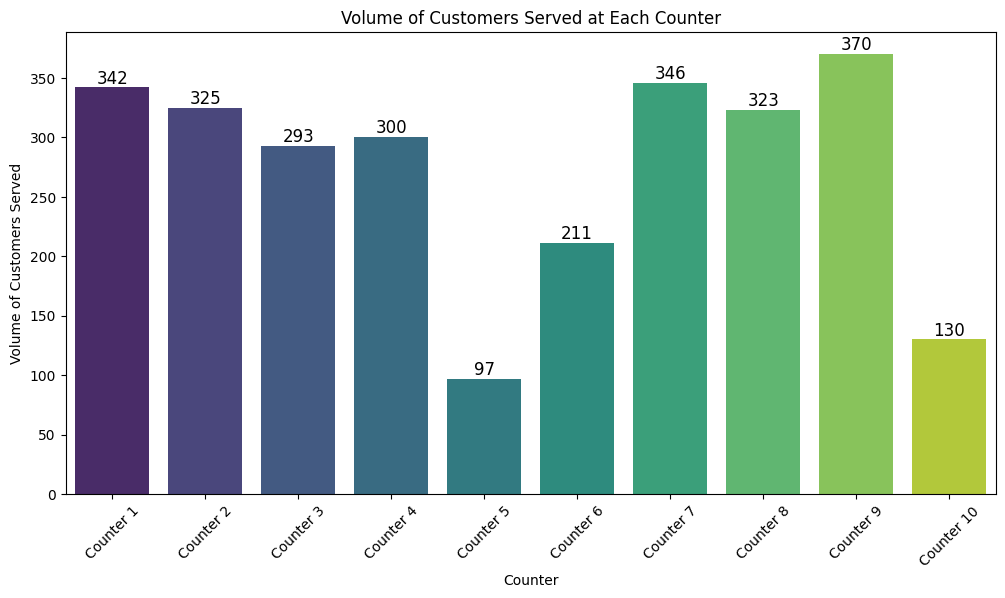

In [299]:
# Number of customer served at each counter
palette = sns.color_palette("viridis", len(metrics_df))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='name', y='volume_served', data=metrics_df, palette=palette)
plt.xlabel('Counter')
plt.ylabel('Volume of Customers Served')
plt.title('Volume of Customers Served at Each Counter')
for p, value in zip(ax.patches, metrics_df['volume_served'].values):
    width = value  
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(width)}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.show()

**Insights**
- The barplot show us that counter 9 serves the most number of people while counter 5 served the less number of people.
- Counter 1, 2 and 7 serves almost equal number of people.

<br>

C:\Users\hp\AppData\Local\Temp\ipykernel_6248\1312940929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y='avg_waiting_time', data=metrics_df, palette=palette)


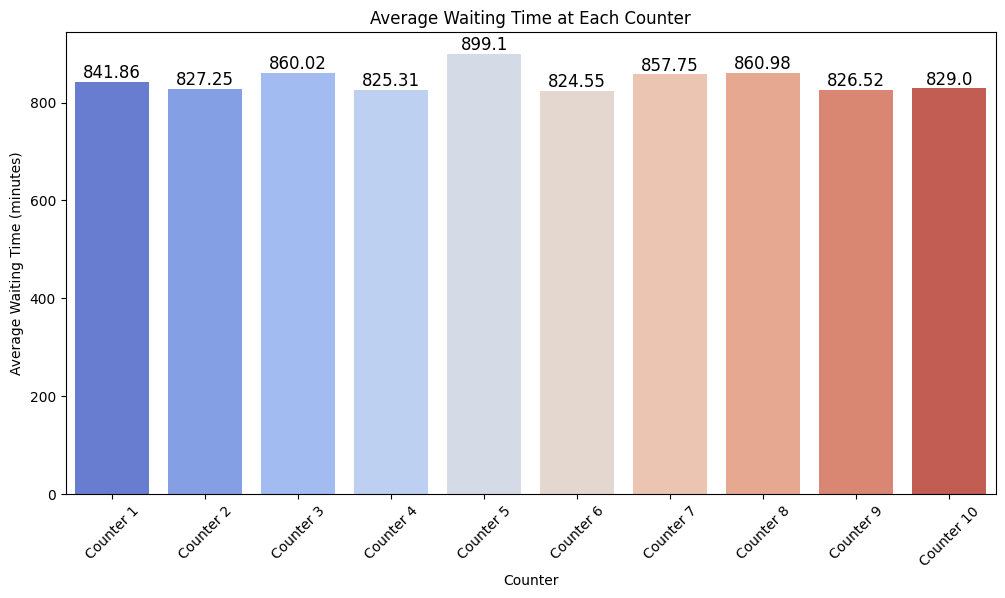

In [300]:
palette = sns.color_palette("coolwarm", len(metrics_df))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='name', y='avg_waiting_time', data=metrics_df, palette=palette)
plt.xlabel('Counter')
plt.ylabel('Average Waiting Time (minutes)')
plt.title('Average Waiting Time at Each Counter')

for p, value in zip(ax.patches, metrics_df['avg_waiting_time'].values):
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            f'{round(value, 2)}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.show()


**Insights**
- The barplot is showing us the average waiting period at each counter to get the work done.
- It shows almost every counter took equal amount of time to give service.

C:\Users\hp\AppData\Local\Temp\ipykernel_6248\656885397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='name', y='avg_service_time', data=metrics_df, palette=palette)


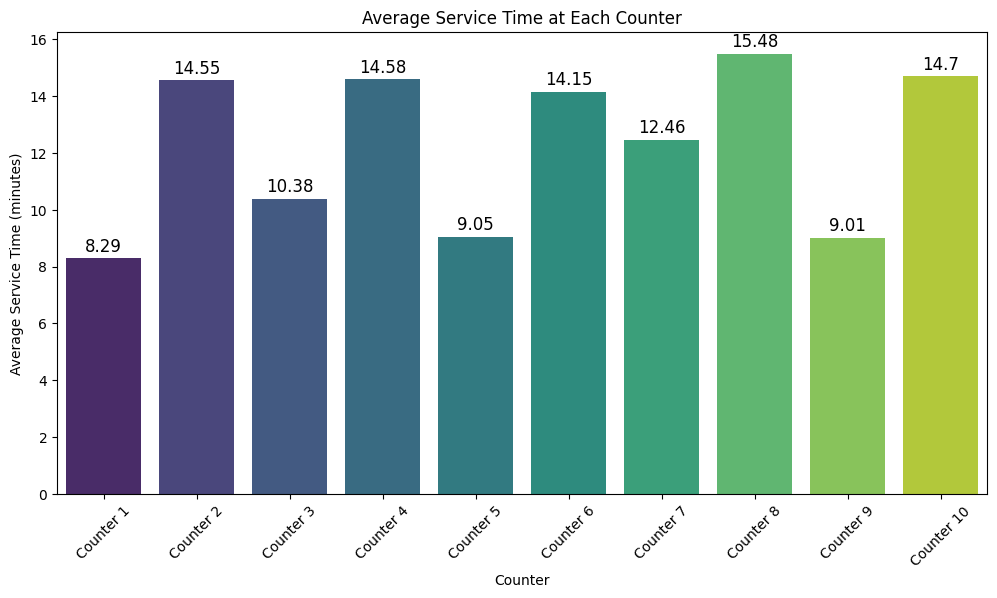

In [301]:
palette = sns.color_palette("viridis", len(metrics_df))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='name', y='avg_service_time', data=metrics_df, palette=palette)
plt.xlabel('Counter')
plt.ylabel('Average Service Time (minutes)')
plt.title('Average Service Time at Each Counter')

for p, value in zip(ax.patches, metrics_df['avg_service_time'].values):
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1,
            f'{round(value, 2)}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.show()

**Insights**
- This barplot show the average service time to get the work done when one's queue come.
- This shows counter 1 and counter 5 get the thing done fast because of which it also serves many people as we saw in first barplot.
- Similarly counter 8 takes most time among all the counters.
- Counter2, Counter4, Counter 6, counter 10 all takes almost equal average time.

<br>

In [302]:
# Working on date columns to see the distribution and key metrics over time
merged_df['called_date'] = pd.to_datetime(merged_df['called_date'])
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['ended_at'] = pd.to_datetime(merged_df['ended_at'])

merged_df['month'] = merged_df['called_date'].dt.month

In [303]:
merged_df.columns

Index(['id', 'queue_id', 'service_id', 'counter_id', 'user_id', 'token_letter',
       'token_number', 'called_date', 'started_at', 'ended_at', 'waiting_time',
       'served_time', 'turn_around_time', 'created_at', 'updated_at',
       'call_status_id', 'name', 'created_at_status', 'updated_at_status',
       'name_counter', 'status', 'created_at_counter', 'updated_at_counter',
       'service_id_queue', 'reference_no', 'created_at_queue',
       'updated_at_queue', 'name_service', 'created_at_service',
       'updated_at_service', 'service_time', 'month'],
      dtype='object')

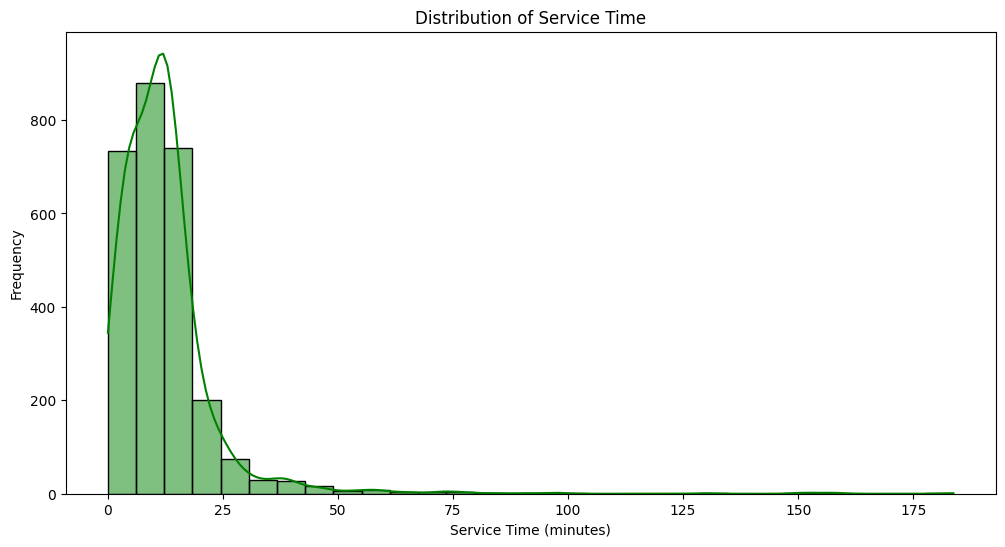

In [304]:
# Histogram for Distribution of Service Time
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['service_time'], bins=30, kde=True, color='green')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Service Time')
plt.show()

**Insights**
- Histogram shows a right-skewed distribution(positive skewness), with most service times concentrated on the left side of the plot.
- Most services are completed within minute range of 5-10 where the peak is highest.
- The services times range widely, with a long tail extending to the right. upto around 175 minutes. This means some services do take significantly longer to complete.

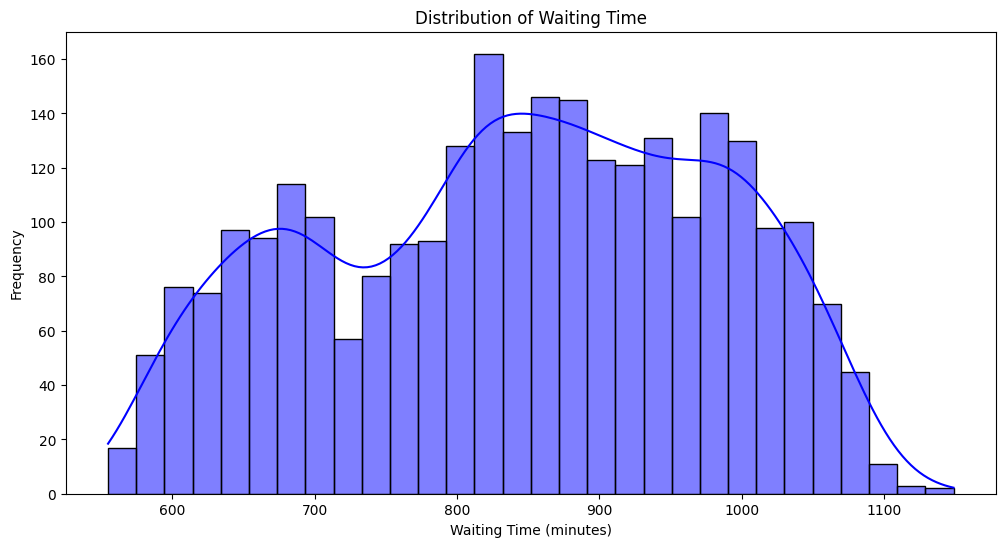

In [305]:
# Histogram for Distribution of Waiting Time
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['waiting_time'], bins=30, kde=True, color='blue')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Time')
plt.show()

**Insights**
- The histogram shows the bimodal distribution, with two noticeable peaks, and a broader spread compared t the service time distribution.
- The highest bar (peak) occurs aroung 800-850 minutes range, indicating a significant number of instances have waiting times in this interval. There is also another noticeable peak that id 650-700
- The waiting time range from around 600 to 1100 minutes which indicates a wide variability in waiting time.

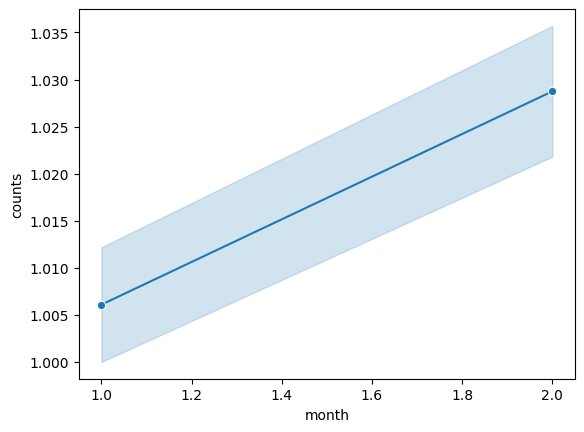

In [309]:
# Waiting time  to month
grouped = merged_df.groupby(['month', 'waiting_time']).size().reset_index(name='counts')

sns.lineplot(data=grouped, x='month', y='counts', marker='o')
plt.show()

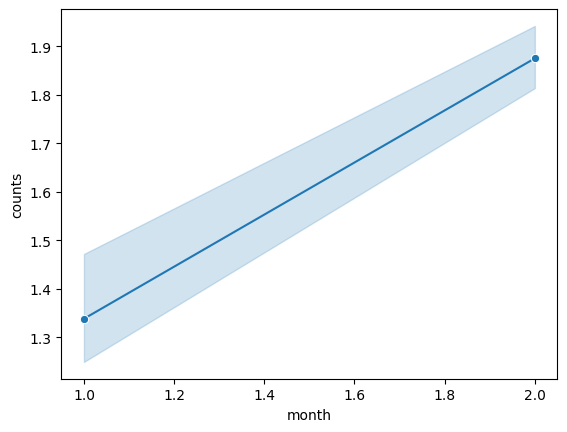

In [311]:
# Service time to month
grouped = merged_df.groupby(['month', 'service_time']).size().reset_index(name='counts')

sns.lineplot(data=grouped, x='month', y='counts', marker='o')
plt.show()

<br>

### Correlation and Insights

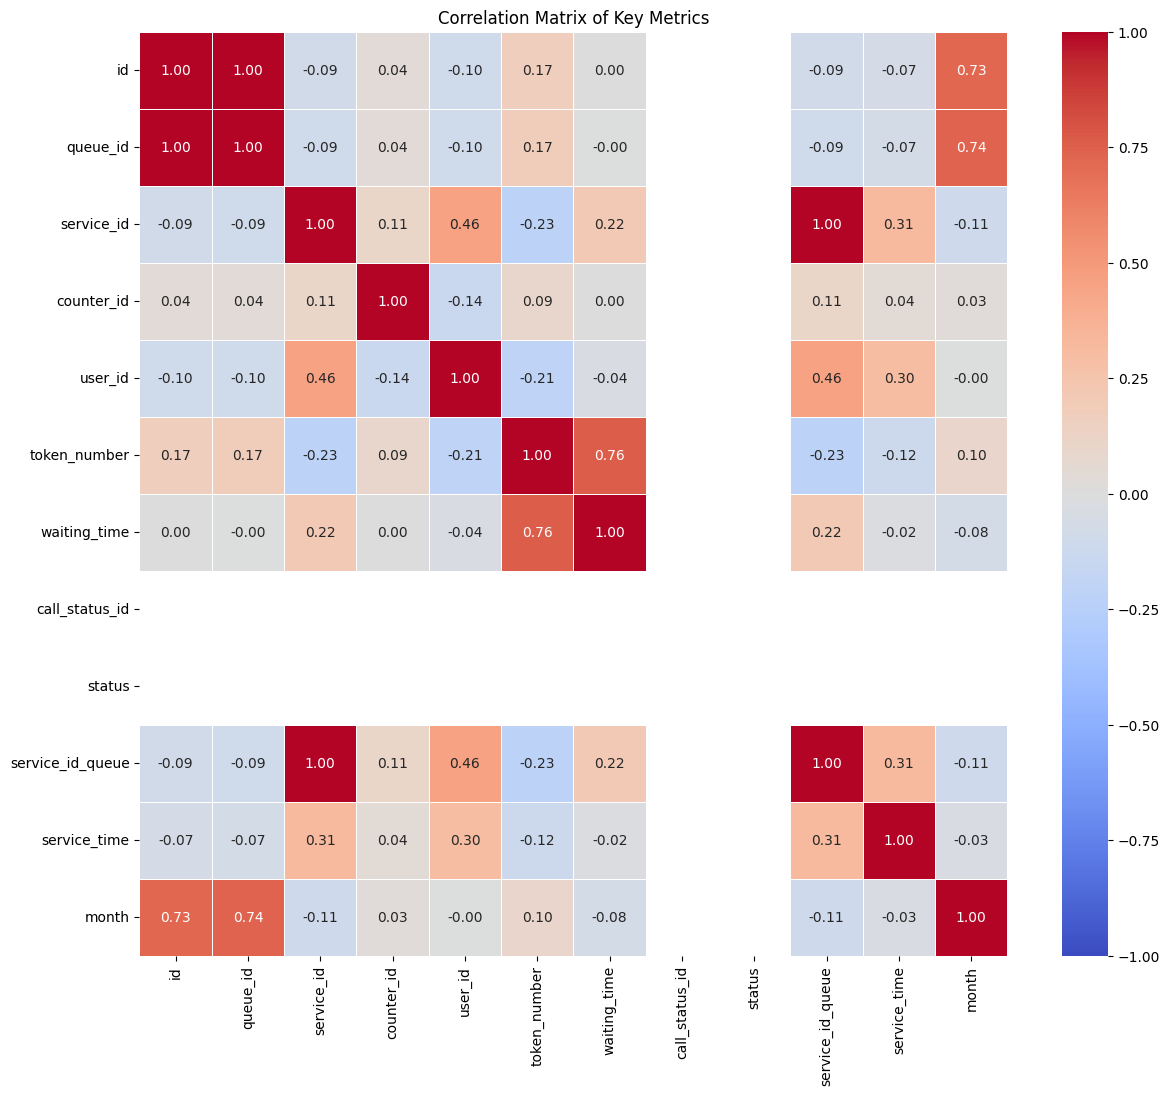

In [315]:
numeric_cols = merged_df.select_dtypes(include=['number'])

corr_matrix = numeric_cols.corr()
plt.figure(figsize=(14, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

**Insights**
- High correlation between `token_number` and `waiting_time` i.e. 0.76 which means longer waiting time as more token are issued.
- Moderate correlation between `service_id` and `user_id` i.e. (0.46), between `service_id_queue` and `user_id`i.e. (0.46).
- Weak Correlation between `counter_id` and `service_time` (0.04). This means service times are consistent across different counters, which indicates uniformity in service delivery across different counters.
- Weak Correlation between `waiting_time` and `month` i.e. (-0.08). This means waiting time do not sigificantly vary by month. Which means stable wait time as we see the barplot too.